In [22]:
import networkx as nx
from networkx import Graph
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def draw_graph_with_edge_labels(g:Graph):
    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True, node_size=700)
    edge_labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

# Question 1

In [4]:
g_8 = nx.Graph()
g_8.add_nodes_from([1,2,3,4,5,6])
g_8.add_edge(1,2,weight=5)
g_8.add_edge(1,6,weight=4)
g_8.add_edge(2,3,weight=4)
g_8.add_edge(2,4,weight=3)
g_8.add_edge(3,6,weight=3)
g_8.add_edge(3,4,weight=1)
g_8.add_edge(4,5,weight=2)
g_8.add_edge(5,6,weight=1)

In [5]:
dist, path = nx.single_source_dijkstra(g_8, 1)

for node in g_8.nodes:
    print("source node: 1, target node: ", node, ", shortest distance: ", dist[node], ", path: ", path[node])

source node: 1, target node:  1 , shortest distance:  0 , path:  [1]
source node: 1, target node:  2 , shortest distance:  5 , path:  [1, 2]
source node: 1, target node:  3 , shortest distance:  7 , path:  [1, 6, 3]
source node: 1, target node:  4 , shortest distance:  7 , path:  [1, 6, 5, 4]
source node: 1, target node:  5 , shortest distance:  5 , path:  [1, 6, 5]
source node: 1, target node:  6 , shortest distance:  4 , path:  [1, 6]


# Question 2

In [6]:
g_7 = nx.Graph()
g_7.add_nodes_from([1,2,3,4,5,6,7,8])
g_7.add_edge(1,2)
g_7.add_edge(2,3)
g_7.add_edge(3,6)
g_7.add_edge(5,6)
g_7.add_edge(5,7)
g_7.add_edge(4,5)
g_7.add_edge(4,8)

In [7]:
bfs = nx.bfs_tree(g_7, 3)
print("BFS visited node order:", bfs.nodes)

BFS visited node order: [3, 2, 6, 1, 5, 7, 4, 8]


In [8]:
dfs = nx.dfs_tree(g_7, 3)
print("DFS visited node order:", dfs.nodes)

DFS visited node order: [3, 2, 1, 6, 5, 7, 4, 8]


# Question 3

In [9]:
g_3 = nx.DiGraph()
g_3.add_nodes_from([1,2,3,4,5,6])
g_3.add_edge(1,2)
g_3.add_edge(2,1)
g_3.add_edge(3,2)
g_3.add_edge(3,6)
g_3.add_edge(6,3)
g_3.add_edge(4,3)
g_3.add_edge(6,5)
g_3.add_edge(5,6)
g_3.add_edge(5,4)

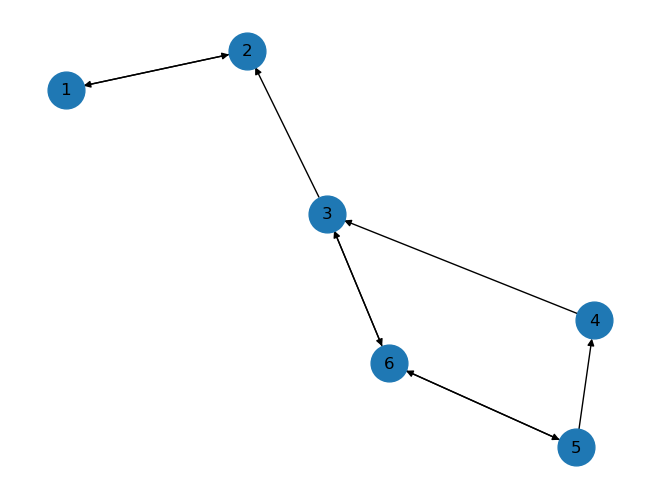

In [10]:
draw_graph_with_edge_labels(g_3)

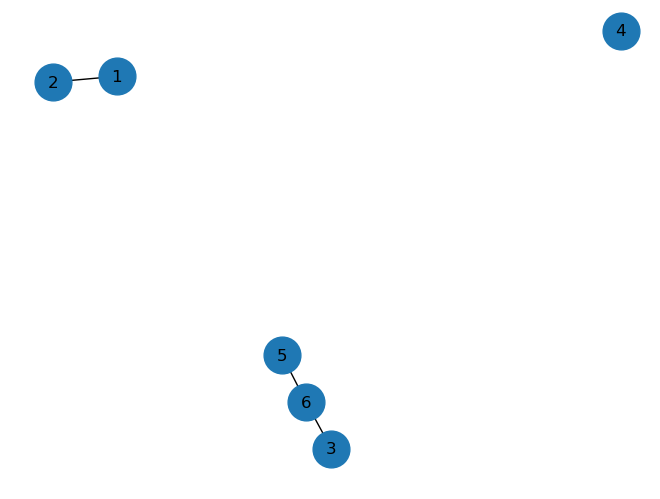

In [11]:
g_3_reciprocal_true = g_3.to_undirected(reciprocal=True)
draw_graph_with_edge_labels(g_3_reciprocal_true)

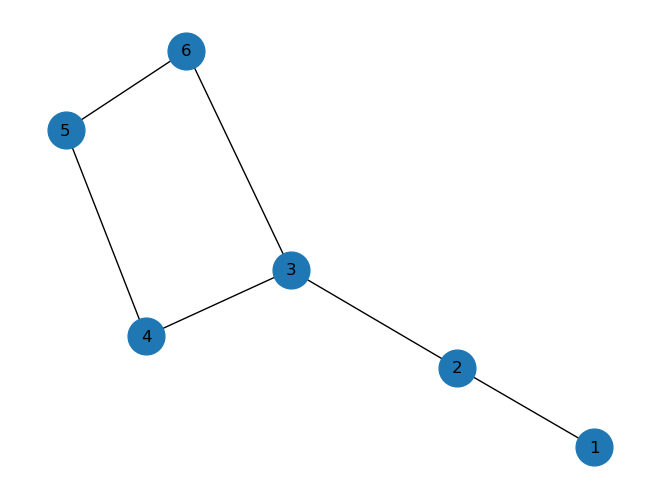

In [12]:
g_3_reciprocal_false = g_3.to_undirected(reciprocal=False)
draw_graph_with_edge_labels(g_3_reciprocal_false)

The difference between `reciprocal=True` and `reciprocal=False`, is that `reciprocal=True` only connects nodes in the resulting undirected graph if they were connected by both directions in the original directed graph, while `reciprocal=False` connects the nodes in the new undirected graph if there was any connection between the nodes in the original directed graph irrelevant of the direction.

# Question 4

In [13]:
twitch_df = pd.read_csv("../data/Twitch_ENGB_edges.csv")
print(twitch_df.head())
len(twitch_df)

   from    to
0  6194   255
1  6194   980
2  6194  2992
3  6194  2507
4  6194   986


35324

In [14]:
twitch_graph = nx.from_pandas_edgelist(twitch_df, source="from", target="to", create_using=nx.Graph())

In [15]:
original_node = 6194
# dictionary with key being the node and the value being list of (dist_from_original_node, frequency)
frequency = {original_node: [0,1]}
walk_length = 5
num_iters = 100

current_node = original_node

for _ in range(num_iters):
    current_node = original_node
    for t in range(walk_length):
        next_nodes = list(twitch_graph.neighbors(current_node))
        next_node = random.choice(next_nodes)
        if next_node in frequency:
            frequency[next_node][1] += 1
        else:
            dist_from_original_node = nx.shortest_path_length(twitch_graph, original_node, next_node)
            frequency[next_node] = [dist_from_original_node, 1]
        current_node = next_node


dist = np.array([v[0] for v in frequency.values()])
freq = np.array([v[1] for v in frequency.values()])

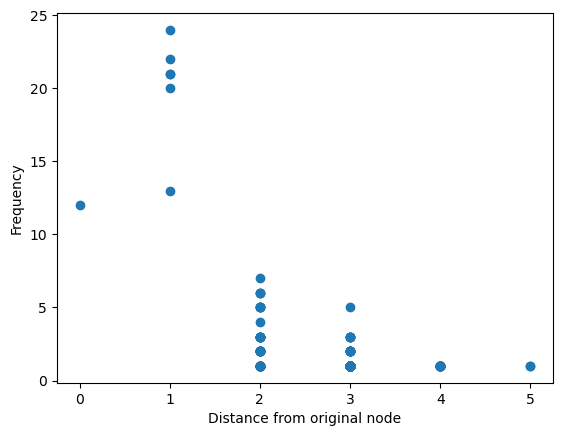

In [16]:
plt.xlabel("Distance from original node")
plt.ylabel("Frequency")
plt.plot(dist, freq, 'o')
plt.show()

In [17]:
print("Correlation coefficient between distance and frequency: ", np.corrcoef(dist, freq)[0,1]) 

Correlation coefficient between distance and frequency:  -0.5350819567629737


With the correlation coefficient, numbers closer to 0 indicate that there is no correlation between the variables. With the resulting correlation coefficient being -0.55, we can conclude that there is a negative linear correlation between distance and frequency of -0.55.

# Question 5

In [18]:
degrees = dict(twitch_graph.degree())
degrees = np.array([d for d in degrees.values()])

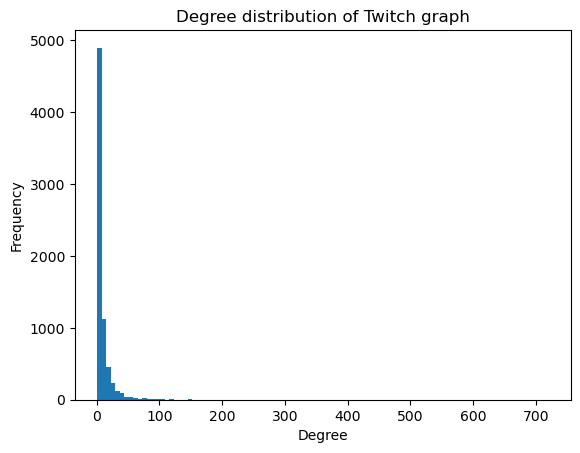

In [19]:
plt.hist(degrees, bins=100)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution of Twitch graph")
plt.show()

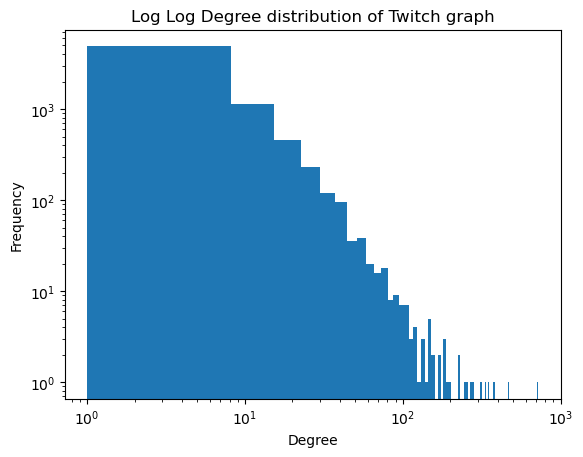

In [20]:
plt.hist(degrees, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Log Log Degree distribution of Twitch graph")
plt.show()

Yes the distribution of the degrees does look like a power law distribution, and the loglog of the degree disribution does look linear. This is because in the twitch network and real networks in general, there are few nodes with very high degree in comparision, and a lot of nodes with very low degree. This results in a sparse graph that follows the power law distribution.

# Question 6

In [23]:
random_graph = nx.Graph()
random_graph.add_nodes_from(range(len(twitch_graph.nodes)))

for node in tqdm(twitch_graph.nodes):
    for node_2 in twitch_graph.nodes:
        if node != node_2:
            prob = np.random.rand()
            if prob < 0.5:
                random_graph.add_edge(node, node_2)

print(random_graph)


100%|██████████| 7126/7126 [01:32<00:00, 76.84it/s]

Graph with 7126 nodes and 19038262 edges


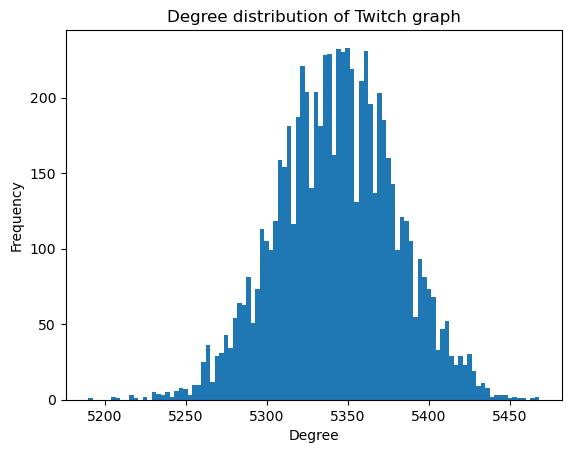

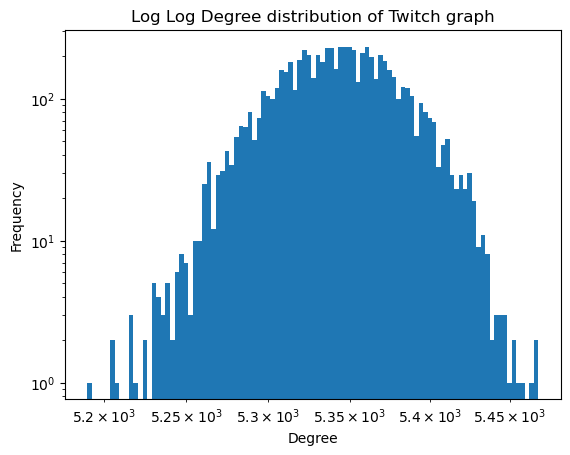

In [24]:
degrees = dict(random_graph.degree())
degrees = np.array([d for d in degrees.values()])

plt.hist(degrees, bins=100)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution of Twitch graph")
plt.show()

plt.hist(degrees, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Log Log Degree distribution of Twitch graph")
plt.show()

In comparison with the twitch graph from question five, this random graph seems to follow a more normal distribution in the original distribution, while the log log distribution follows a somewhat normal distribution that is definitely not linear.

# Question 7

In [ ]:
job_graph = nx.DiGraph()

job_graph.add_node("v1", location="Salt Lake City", job="student", age=24, color="red")
job_graph.add_node("v2", location="Logan", job="student", color="red")
job_graph.add_node("v3", gender="female", job="CEO", color="yellow")
job_graph.add_node("v4", country="Japan", interests=["soccer"], color="green")
job_graph.add_node("v5", location="Pheonix", job="programmer", interests=["coding"], color="green")
job_graph.add_node("v6", location="Las Vegas", job="musician", interests=["music","movies"], color="yellow")

job_graph.add_edge("v1", "v2", weight=8)
job_graph.add_edge("v2", "v1", weight=8)
job_graph.add_edge("v3", "v2")
job_graph.add_edge("v4", "v3")
job_graph.add_edge("v3", "v6")
job_graph.add_edge("v6", "v3")
job_graph.add_edge("v5", "v4")
job_graph.add_edge("v5", "v6")
job_graph.add_edge("v6", "v5")









